# Using a New Machine Learning Classifier for Recipe Classiifer

Need to adapt all of this below. 
To add : 
- [DONE] calculate amount of fat
- [DONE]calculate % of macro nutrients (fat, carb, protein)
- [DONE] categories for balanced, hi-protein+hi_fat, hi_carb+hi_fat, lo_carb+high_protein, hi-carb+hi-protein
- [DONE/NO CHANGE]]find a python library to create feat engineering combining numeral feats togehther (multiplication, square, root, etc)
- [DONE]add a tool to compare b/w several models and recommend the best one 
- [DONE]add SHAP
- [DONE]add neural network with regulation 
- [DONE]check if ok to use mean for imputing misisng value with skewed distribution - median is better in this case as macro nutrient distributions are skewed to the right.
- [DONE]check and resolve class imbalance
- [DONE] Add manually a new cluster for balanced food
- [DONE] Make sure to keep the statiscally significant feature in before eliminating the most correlated feat




## Background

Choosing a machine learning model to use in a trading strategy is a matter of trial and error. In this way, you find a model that produces the desired outcomes with an acceptable level of performance.

In the machine learning section of the boot camp, you learned about some classification models, such as logistic regression, support vector machines (SVM), and neural networks. In this activity, you'll train a logistic regression model to make trading predictions, backtest the results, and then evaluate its performance compared to that of a SVM model.

## Methods:

1. Open the provided starter code. Inspect and run all the cells up to the “Add a New Machine Learning Model” section to review the data loading and preparation process, as well as the inclusion of a SVM model in a trading algorithm.

2. Import the `LogisticRegression` model from scikit-learn.

    > **Rewind** Recall that `LogisticRegression` models are used for binary classification problems.

3. Using the same training data that the SVM model used (`X_train_scaled` and `y_train`), fit the `LogisticRegression` model.

4. Use the trained model to predict the trading signals for the training data. Use the `classification_report` module to evaluate the model.

5. Backtest the `LogisticRegression` model to evaluate its performance.

6. Compare the performance of the logistic regression and SVM models using the classification reports generated with the testing data.  Did the logistic regression model perform better than SVM? Write down your conclusions to share with the class.


## References

* [SKLearn SVM - SVC Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

* [SKLearn LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

---

In [1418]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

### Read the CSV file into Pandas DataFrame

In [1419]:
# Import the OHLCV dataset into a Pandas Dataframe
recipe_df = pd.read_csv(
    Path("recipe_site_traffic_2212.csv"), 

)

# Review the DataFrame
recipe_df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [1420]:
recipe_df = recipe_df.set_index("recipe")
recipe_df.index.name = "recipe_id"
recipe_df = recipe_df.sort_index()

In [1421]:
recipe_df.describe()

,calories,carbohydrate,sugar,protein
count,895.00,895.00,895.00,895.00
mean,435.94,35.07,9.05,24.15
std,453.02,43.95,14.68,36.37
min,0.14,0.03,0.01,0.00
25%,110.43,8.38,1.69,3.20
50%,288.55,21.48,4.55,10.80
75%,597.65,44.97,9.80,30.20
max,"3,633.16",530.42,148.75,363.36


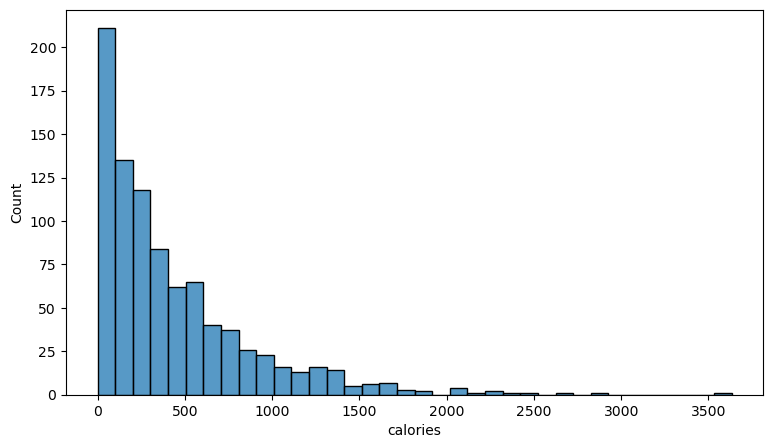

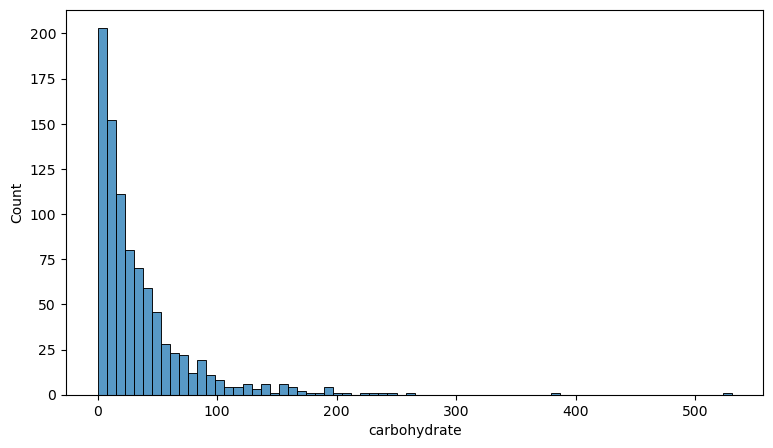

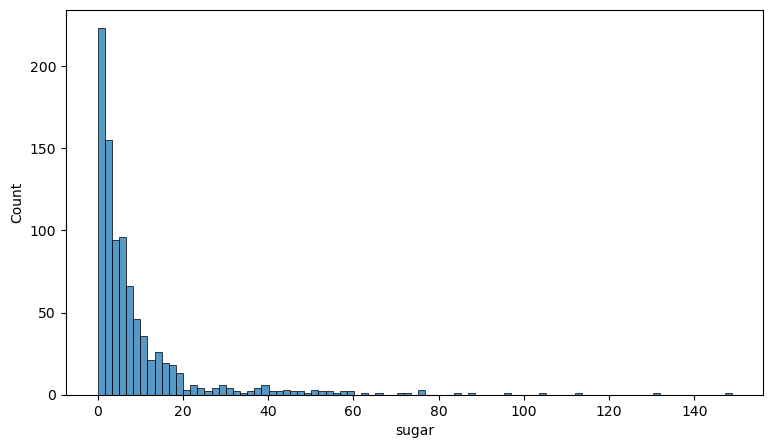

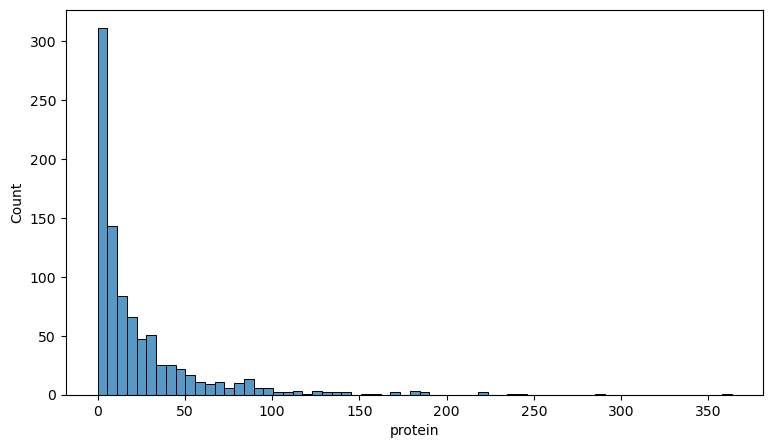

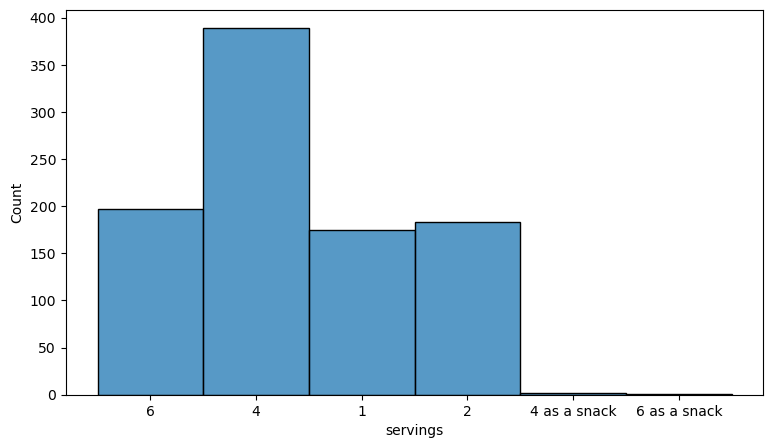

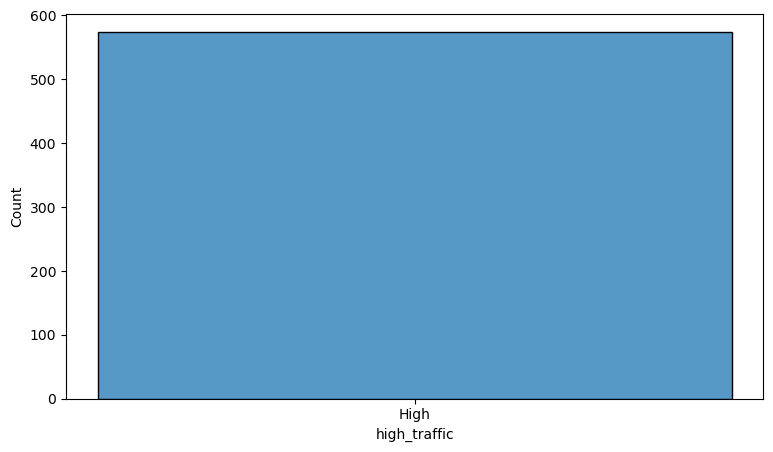

In [1422]:
num_columns =('calories','carbohydrate','sugar','protein','servings','high_traffic')

for column in num_columns:
    plt.figure()
    sns.histplot(data=recipe_df, x=column)
    plt.show()

### Some Preprocessing
---

In [1423]:
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    object 
 6   high_traffic  574 non-null    object 
dtypes: float64(4), object(3)
memory usage: 59.2+ KB


In [1424]:
qc_recipe_df = recipe_df

# Replace all null values in column 'High_Traffic' with 0
qc_recipe_df['high_traffic'].fillna(0, inplace=True)

# Replace all 'High' values in column 'High_Traffic' with 1
qc_recipe_df['high_traffic'] = qc_recipe_df['high_traffic'].replace('High', 1)

qc_recipe_df.head()



,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe_id,,,,,,,
1,NaN,NaN,NaN,NaN,Pork,6,1
2,35.48,38.56,0.66,0.92,Potato,4,1
3,914.28,42.68,3.09,2.88,Breakfast,1,0
4,97.03,30.56,38.63,0.02,Beverages,4,1
5,27.05,1.85,0.80,0.53,Beverages,4,0


In [1425]:
qc_recipe_df['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [1426]:
#replace "Lunch/Snacks" value in "category" column by "Lunch_Snacks" and replace spaces by "_" 
qc_recipe_df['category'] = qc_recipe_df['category'].replace('Lunch/Snacks', 'Lunch_Snacks')
qc_recipe_df['category'] = qc_recipe_df['category'].replace('One Dish Meal', 'One_Dish_Meal')
qc_recipe_df['category'] = qc_recipe_df['category'].replace('Chicken Breast', 'Chicken_Breast')

In [1427]:
# check value of servings 
qc_recipe_df['servings'].unique()


array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

#### Understanding what "as a snack" means in the servings size

In [1428]:
# let's understand what are the '6' servings and '6 as a snack' to understand better what '6 as a snack' means
serving6mean_df =  qc_recipe_df.loc[qc_recipe_df['servings']=='6'][['calories','carbohydrate','sugar','protein']].mean()
serving4mean_df =  qc_recipe_df.loc[qc_recipe_df['servings']=='4'][['calories','carbohydrate','sugar','protein']].mean()
serving6snack_df=  qc_recipe_df.loc[qc_recipe_df['servings']=='6 as a snack']
serving4snack_df=  qc_recipe_df.loc[qc_recipe_df['servings']=='4 as a snack']

In [1429]:
pd.options.display.float_format = '{:,.2f}'.format
print(serving6mean_df)

calories       419.13
carbohydrate    32.38
sugar            8.64
protein         24.60
dtype: float64


In [1430]:
serving6snack_df

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe_id,,,,,,,
549,"1,440.69",30.59,5.78,30.63,Lunch_Snacks,6 as a snack,1


In [1431]:
print(serving4mean_df)

calories       423.05
carbohydrate    36.08
sugar            9.15
protein         22.54
dtype: float64


In [1432]:
serving4snack_df

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe_id,,,,,,,
452,"1,542.53",14.73,5.71,29.92,Lunch_Snacks,4 as a snack,1
736,513.75,65.87,18.63,18.39,Lunch_Snacks,4 as a snack,0


In [1433]:
# lets remove ' as a snack' string from the column values for 'servings'
qc_recipe_df["servings"] = qc_recipe_df["servings"].str.replace(" as a snack", "")

# make sure that the values in the 'servings' column are numeric
qc_recipe_df["servings"] = pd.to_numeric(qc_recipe_df["servings"], errors='coerce')


In [1434]:
qc_recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    int64  
 6   high_traffic  947 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 59.2+ KB


In [1435]:
#create new columns for the food specs (calories, carbohydrate, sugar, protein) per serving
qc_recipe_df['calories_per_serving'] = qc_recipe_df['calories'] / qc_recipe_df['servings']
qc_recipe_df['carbohydrate_per_serving'] = qc_recipe_df['carbohydrate'] / qc_recipe_df['servings']
qc_recipe_df['sugar_per_serving'] = qc_recipe_df['sugar'] / qc_recipe_df['servings']
qc_recipe_df['protein_per_serving'] = qc_recipe_df['protein'] / qc_recipe_df['servings']


#### Check if we can use the category to impute the missing value using the mean of each category

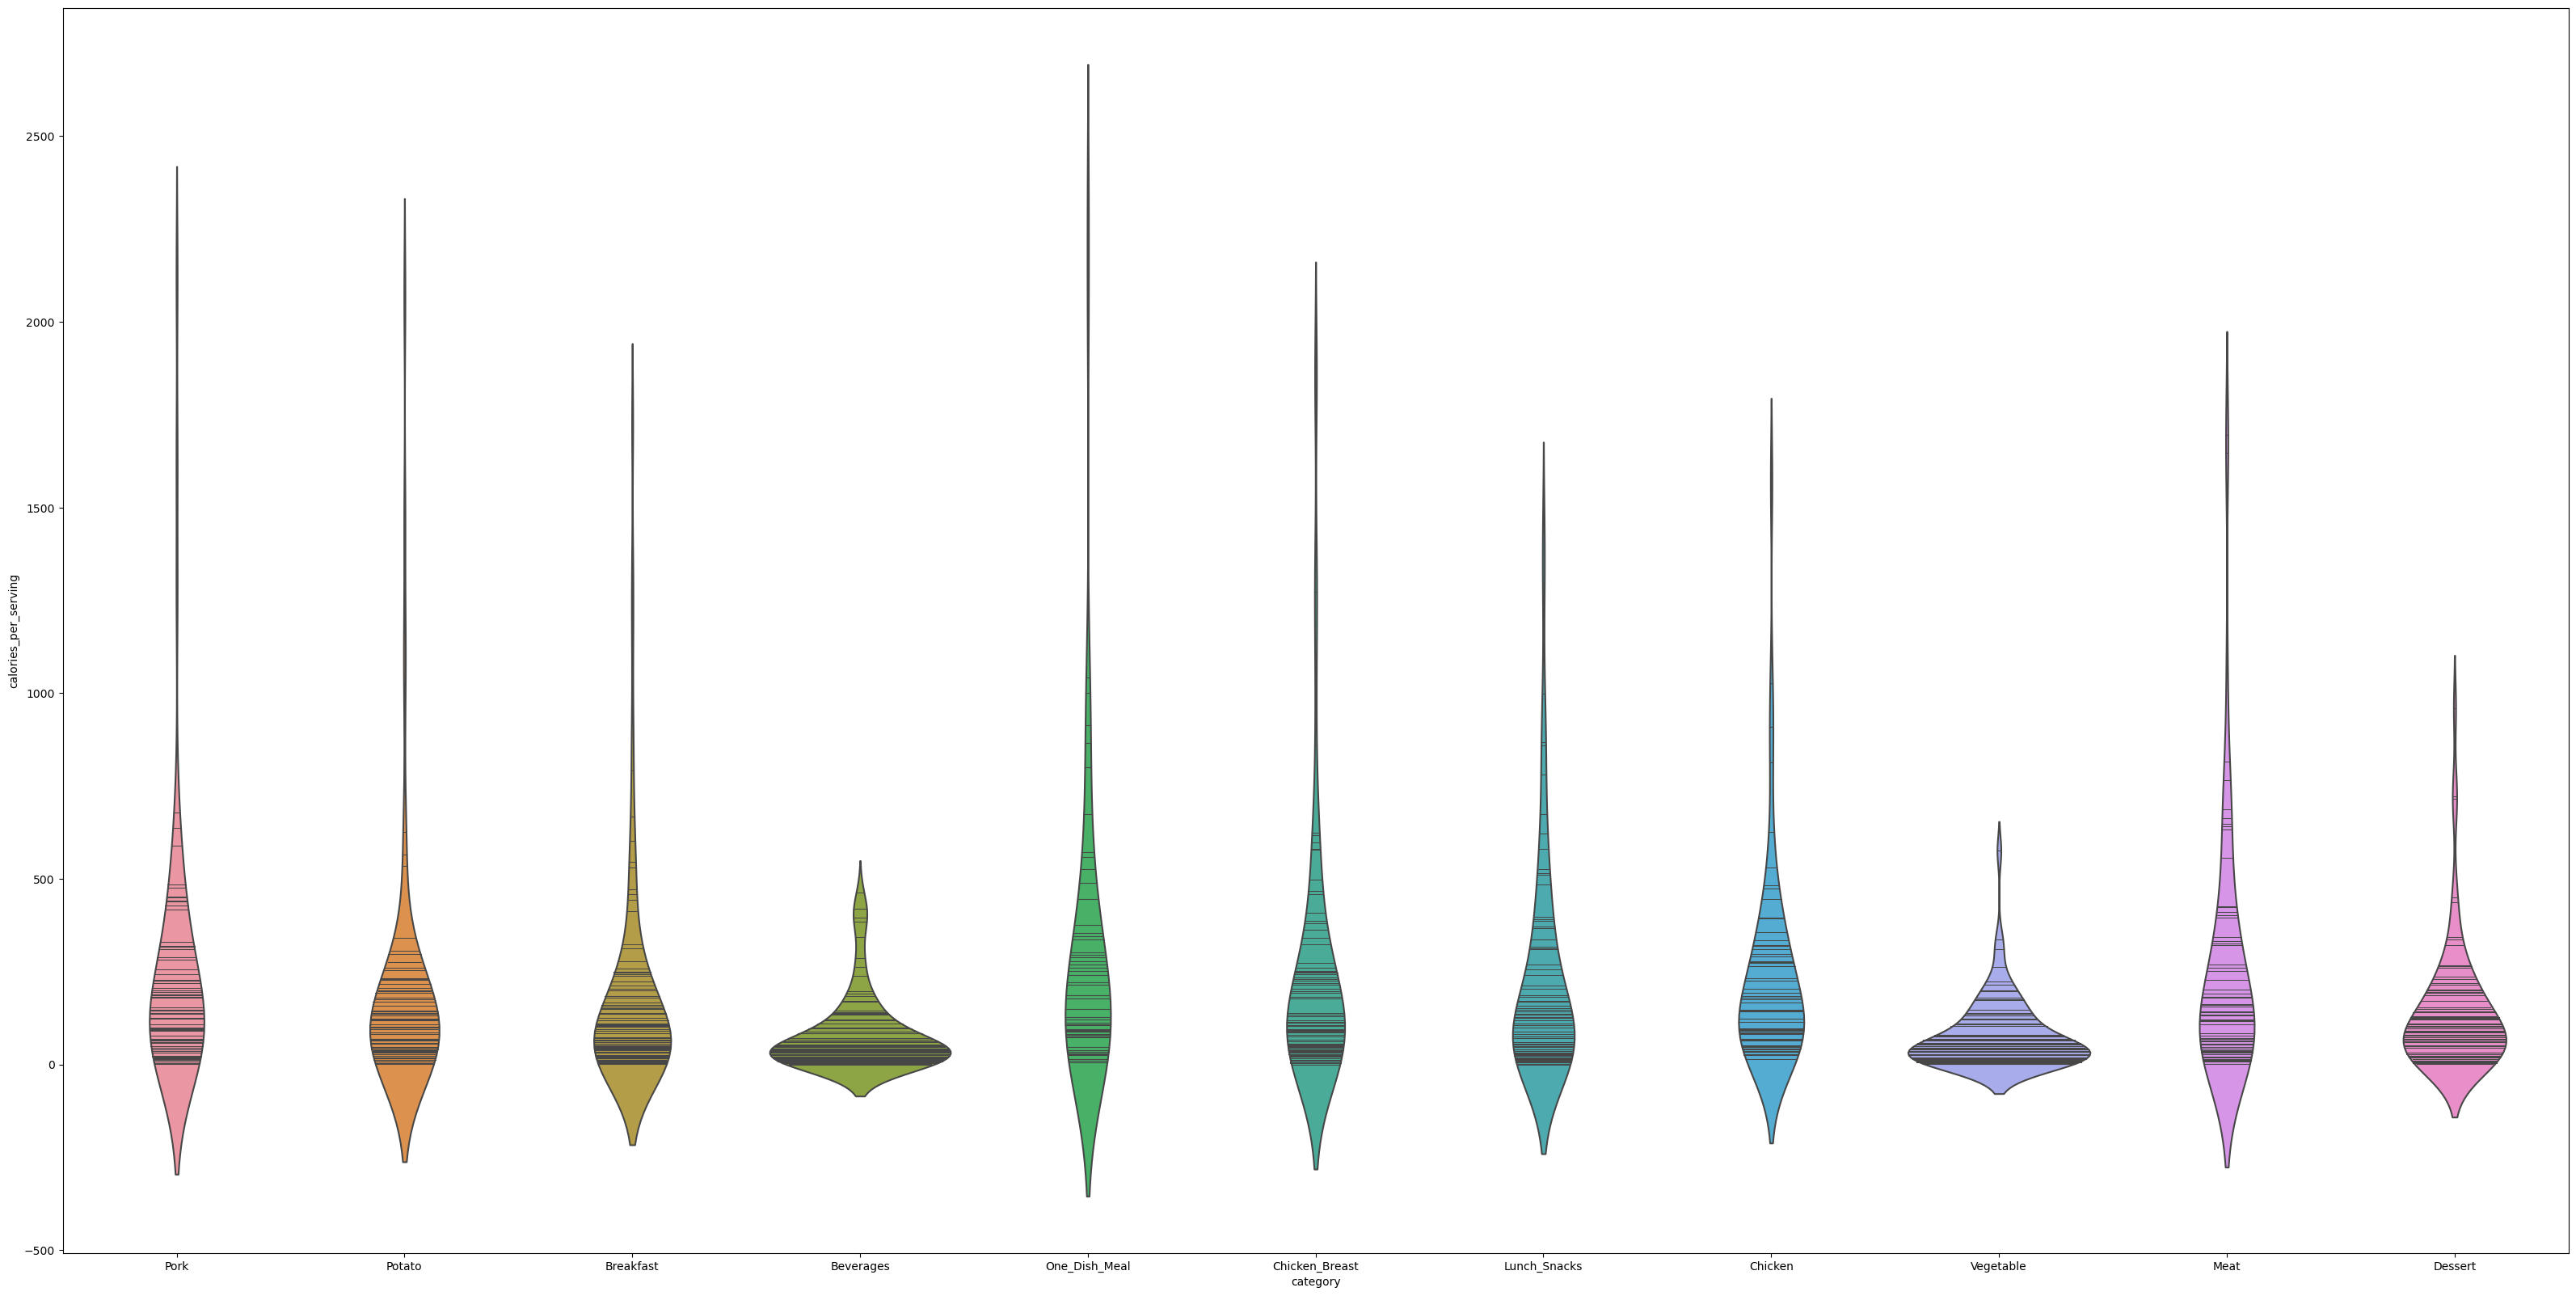

In [1436]:
# Set the figure size
plt.figure(figsize=(40, 20))

# Create violin plots for column 'sugar' across different categories
sns.violinplot(data=qc_recipe_df, x="category", y="calories_per_serving", inner="stick")

# Show the plot
plt.show()

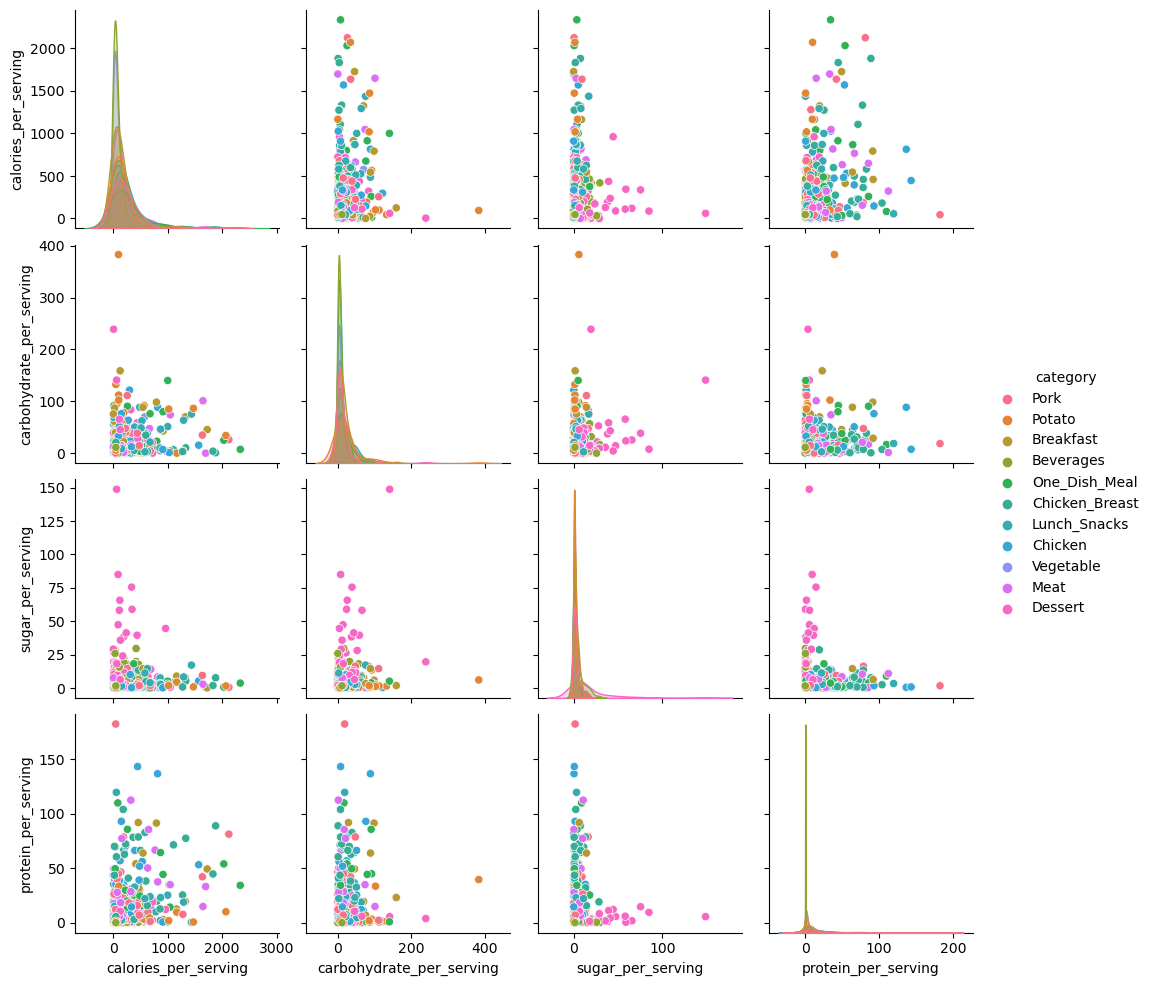

In [1437]:
sns.pairplot(data=qc_recipe_df, vars=["calories_per_serving","carbohydrate_per_serving","sugar_per_serving","protein_per_serving"], hue="category")

### It looks like there are some outliers within some category. Let's dive deeper into this

In [1438]:
qc_recipe_df['protein_per_serving'].describe()

count   895.00
mean     10.45
std      18.92
min       0.00
25%       0.98
50%       3.34
75%      11.12
max     182.63
Name: protein_per_serving, dtype: float64

In [1439]:
qc_recipe_df['calories_per_serving'].describe()

count     895.00
mean      191.21
std       290.15
min         0.07
25%        33.69
50%        93.57
75%       225.24
max     2,332.32
Name: calories_per_serving, dtype: float64

In [1440]:
qc_recipe_df['sugar_per_serving'].describe()

count   895.00
mean      3.83
std       8.74
min       0.00
25%       0.54
50%       1.40
75%       3.77
max     148.75
Name: sugar_per_serving, dtype: float64

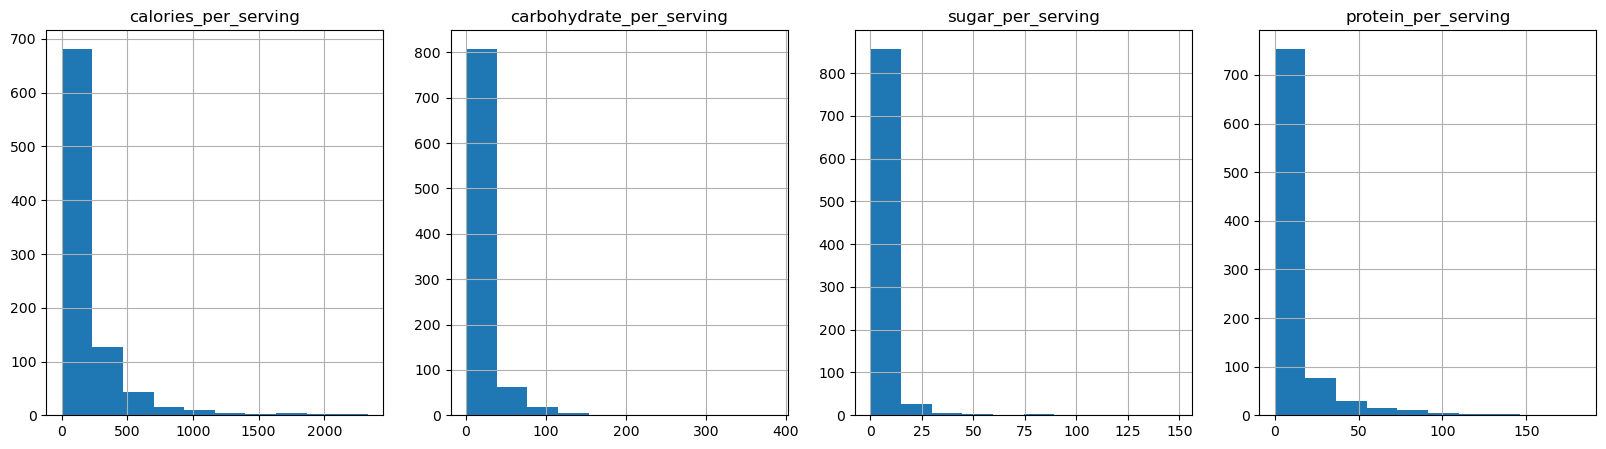

In [1441]:
# create the subplots
fig, axs = plt.subplots(1, 4, figsize=(20,5))

# plot the histograms
qc_recipe_df["calories_per_serving"].hist(ax=axs[0])
qc_recipe_df["carbohydrate_per_serving"].hist(ax=axs[1])
qc_recipe_df["sugar_per_serving"].hist(ax=axs[2])
qc_recipe_df["protein_per_serving"].hist(ax=axs[3])

# Add titles to the subplots
axs[0].set_title("calories_per_serving")
axs[1].set_title("carbohydrate_per_serving")
axs[2].set_title("sugar_per_serving")
axs[3].set_title("protein_per_serving")

plt.show()

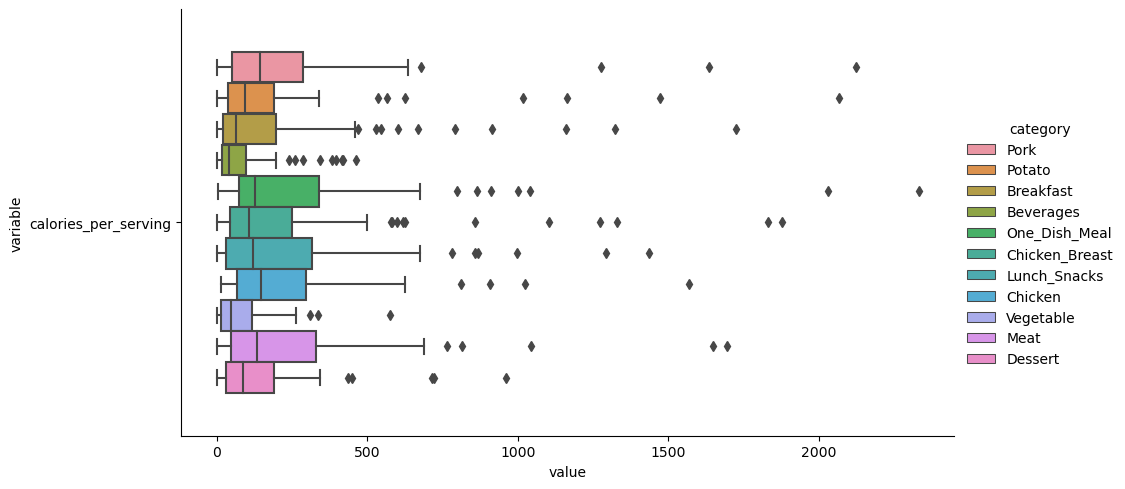

In [1442]:
import seaborn as sns

# Use melt to reshape the DataFrame so that it has a single column for the values and a separate column for the variable
melted_df = qc_recipe_df.melt(id_vars=['category','servings'], value_vars=['calories_per_serving'], value_name='value', var_name='variable')

# Use catplot to create boxplots for the columns 'calories_per_serving', 'carbohydrate_per_serving', 'sugar_per_serving', 'protein_per_serving'
sns.catplot(data=melted_df, x='value', y='variable', hue='category', kind='box', aspect=2)

# Show the plot
plt.show()


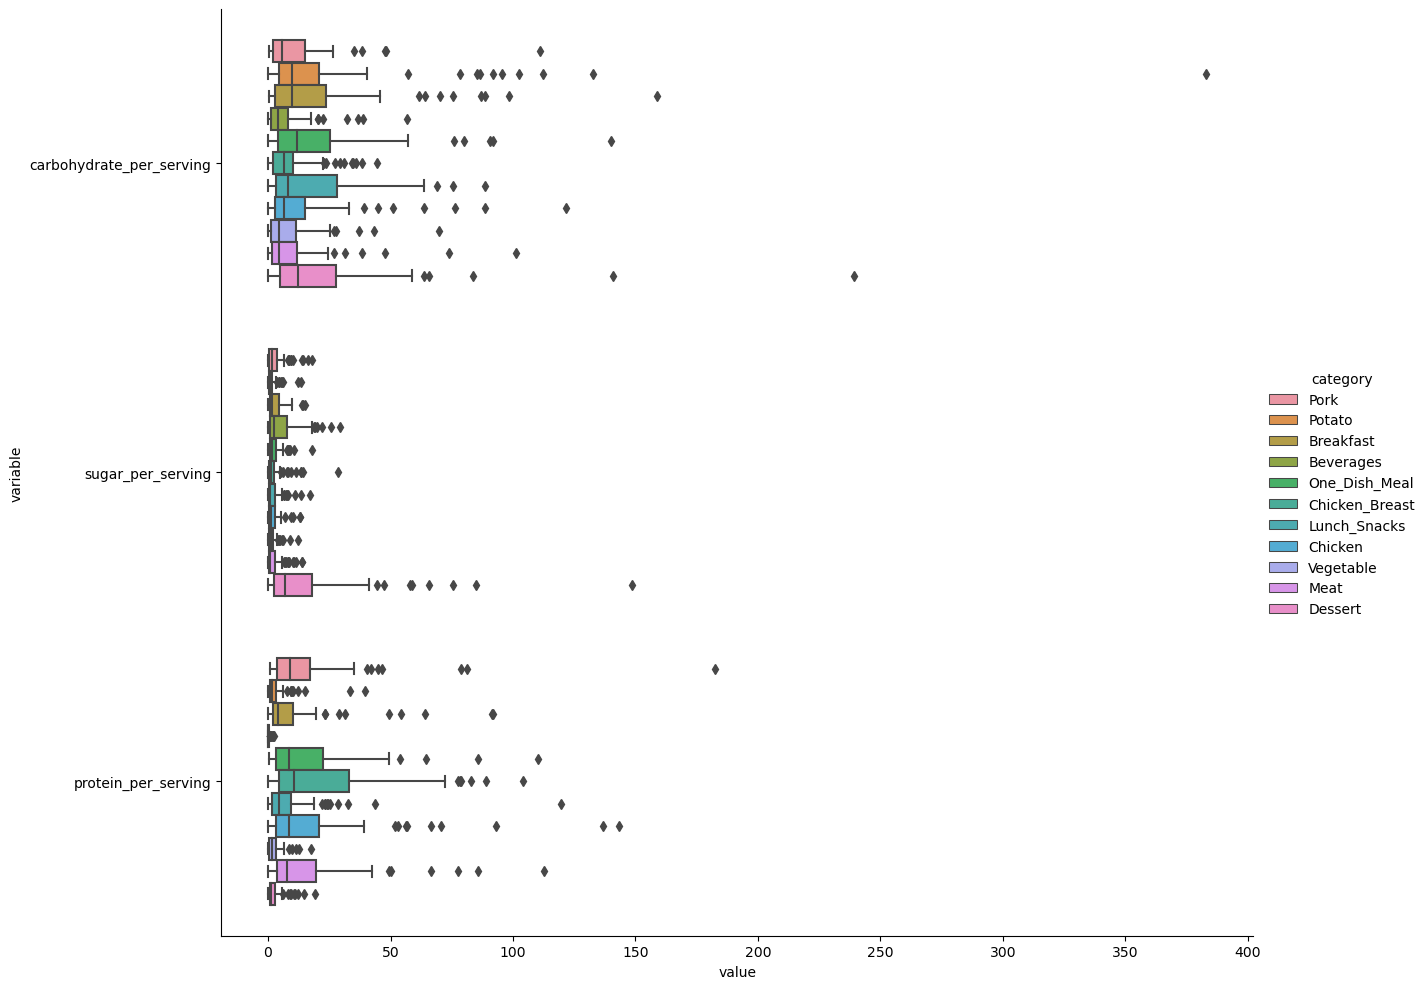

In [1443]:
# Use melt to reshape the DataFrame so that it has a single column for the values and a separate column for the variable
melted_df2 = qc_recipe_df.melt(id_vars=['category','servings'], value_vars=['carbohydrate_per_serving','sugar_per_serving','protein_per_serving'], value_name='value', var_name='variable')


# Use catplot to create boxplots for the columns 'calories_per_serving', 'carbohydrate_per_serving', 'sugar_per_serving', 'protein_per_serving'
sns.catplot(data=melted_df2, x='value', y='variable', hue='category', kind='box', height=10, aspect=1.3)

# Show the plot
plt.show()


### Let's identify those outliers 

In [1444]:
def id_outlier(food_spec,qa1,qa3):
    # Calculate the interquartile range (IQR) of the 'calories' column
    q1, q3 = qc_recipe_df[food_spec].quantile([qa1,qa3])
    iqr = q3 - q1
    
    # Identify the outliers using the IQR and the lower and upper bounds.
    lower_bound = 0 #q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = qc_recipe_df[(qc_recipe_df[food_spec] < lower_bound) | (qc_recipe_df[food_spec] > upper_bound)]

    return outliers


In [1445]:
id_outlier('calories_per_serving',0.5,0.95)

,calories,carbohydrate,sugar,protein,category,servings,high_traffic,calories_per_serving,carbohydrate_per_serving,sugar_per_serving,protein_per_serving
recipe_id,,,,,,,,,,,
18,"1,695.82",0.10,0.39,33.17,Meat,1,1,"1,695.82",0.10,0.39,33.17
50,"1,724.25",45.52,0.07,49.37,Breakfast,1,1,"1,724.25",45.52,0.07,49.37
56,"2,122.24",25.99,0.52,81.37,Pork,1,1,"2,122.24",25.99,0.52,81.37
148,"1,568.00",15.49,5.23,53.23,Chicken,1,0,"1,568.00",15.49,5.23,53.23
293,"1,878.82",0.80,7.60,89.01,Chicken_Breast,1,1,"1,878.82",0.80,7.60,89.01
419,"1,830.28",3.92,1.83,44.74,Chicken_Breast,1,1,"1,830.28",3.92,1.83,44.74
429,"1,646.83",101.11,2.77,14.87,Meat,1,1,"1,646.83",101.11,2.77,14.87
567,"1,635.46",35.00,9.39,42.13,Pork,1,0,"1,635.46",35.00,9.39,42.13
637,"2,029.33",25.08,0.61,54.00,One_Dish_Meal,1,1,"2,029.33",25.08,0.61,54.00


In [1446]:
id_outlier('protein_per_serving',0.5,0.95)

,calories,carbohydrate,sugar,protein,category,servings,high_traffic,calories_per_serving,carbohydrate_per_serving,sugar_per_serving,protein_per_serving
recipe_id,,,,,,,,,,,
30,164.76,33.58,17.87,220.14,One_Dish_Meal,2,1,82.38,16.79,8.94,110.07
64,813.08,88.55,0.47,136.89,Chicken,1,1,813.08,88.55,0.47,136.89
343,111.10,37.55,6.60,239.57,Lunch_Snacks,2,0,55.55,18.77,3.30,119.78
639,321.95,1.41,10.76,112.64,Meat,1,1,321.95,1.41,10.76,112.64
696,891.11,15.20,1.50,286.97,Chicken,2,0,445.56,7.60,0.75,143.49
783,44.15,18.62,1.65,182.63,Pork,1,1,44.15,18.62,1.65,182.63


In [1447]:
id_outlier('sugar_per_serving',0.5,0.95)

,calories,carbohydrate,sugar,protein,category,servings,high_traffic,calories_per_serving,carbohydrate_per_serving,sugar_per_serving,protein_per_serving
recipe_id,,,,,,,,,,,
60,384.93,74.38,76.53,2.17,Dessert,2,0,192.47,37.19,38.27,1.08
97,88.57,14.31,47.32,5.67,Dessert,1,1,88.57,14.31,47.32,5.67
134,959.51,4.40,44.54,12.12,Dessert,1,0,959.51,4.40,44.54,12.12
272,435.94,58.65,39.46,11.18,Dessert,1,1,435.94,58.65,39.46,11.18
291,239.90,51.13,131.39,3.38,Dessert,2,1,119.95,25.57,65.69,1.69
379,235.91,43.20,41.24,4.27,Dessert,1,1,235.91,43.20,41.24,4.27
497,260.15,23.07,71.52,3.22,Dessert,2,1,130.07,11.54,35.76,1.61
541,60.62,140.98,148.75,5.53,Dessert,1,0,60.62,140.98,148.75,5.53
593,87.04,7.73,84.96,9.45,Dessert,1,1,87.04,7.73,84.96,9.45


In [1448]:
id_outlier('carbohydrate_per_serving',0.5,0.95)

,calories,carbohydrate,sugar,protein,category,servings,high_traffic,calories_per_serving,carbohydrate_per_serving,sugar_per_serving,protein_per_serving
recipe_id,,,,,,,,,,,
168,4.41,239.06,19.54,3.76,Dessert,1,1,4.41,239.06,19.54,3.76
228,124.79,158.92,1.76,23.07,Breakfast,1,1,124.79,158.92,1.76,23.07
350,94.27,383.06,5.98,39.61,Potato,1,1,94.27,383.06,5.98,39.61
451,182.76,530.42,5.80,5.01,Potato,4,1,45.69,132.60,1.45,1.25
541,60.62,140.98,148.75,5.53,Dessert,1,0,60.62,140.98,148.75,5.53
718,999.59,140.22,5.08,0.76,One_Dish_Meal,1,1,999.59,140.22,5.08,0.76


##### The value of protein > 150, sugar >100 , carb > 200 seems really extreme. We will remove them 

In [1449]:
outliers = qc_recipe_df[(qc_recipe_df['carbohydrate_per_serving'] > 200) | (qc_recipe_df['sugar_per_serving'] > 100) | (qc_recipe_df['protein_per_serving'] > 150)]

In [1450]:
outliers

,calories,carbohydrate,sugar,protein,category,servings,high_traffic,calories_per_serving,carbohydrate_per_serving,sugar_per_serving,protein_per_serving
recipe_id,,,,,,,,,,,
168,4.41,239.06,19.54,3.76,Dessert,1,1,4.41,239.06,19.54,3.76
350,94.27,383.06,5.98,39.61,Potato,1,1,94.27,383.06,5.98,39.61
541,60.62,140.98,148.75,5.53,Dessert,1,0,60.62,140.98,148.75,5.53
783,44.15,18.62,1.65,182.63,Pork,1,1,44.15,18.62,1.65,182.63


In [1451]:
# Remove the subset dataframe 'outliers' from the original dataset
qc_recipe_df = pd.concat([qc_recipe_df, outliers]).drop_duplicates(keep=False)

<Figure size 2000x500 with 0 Axes>

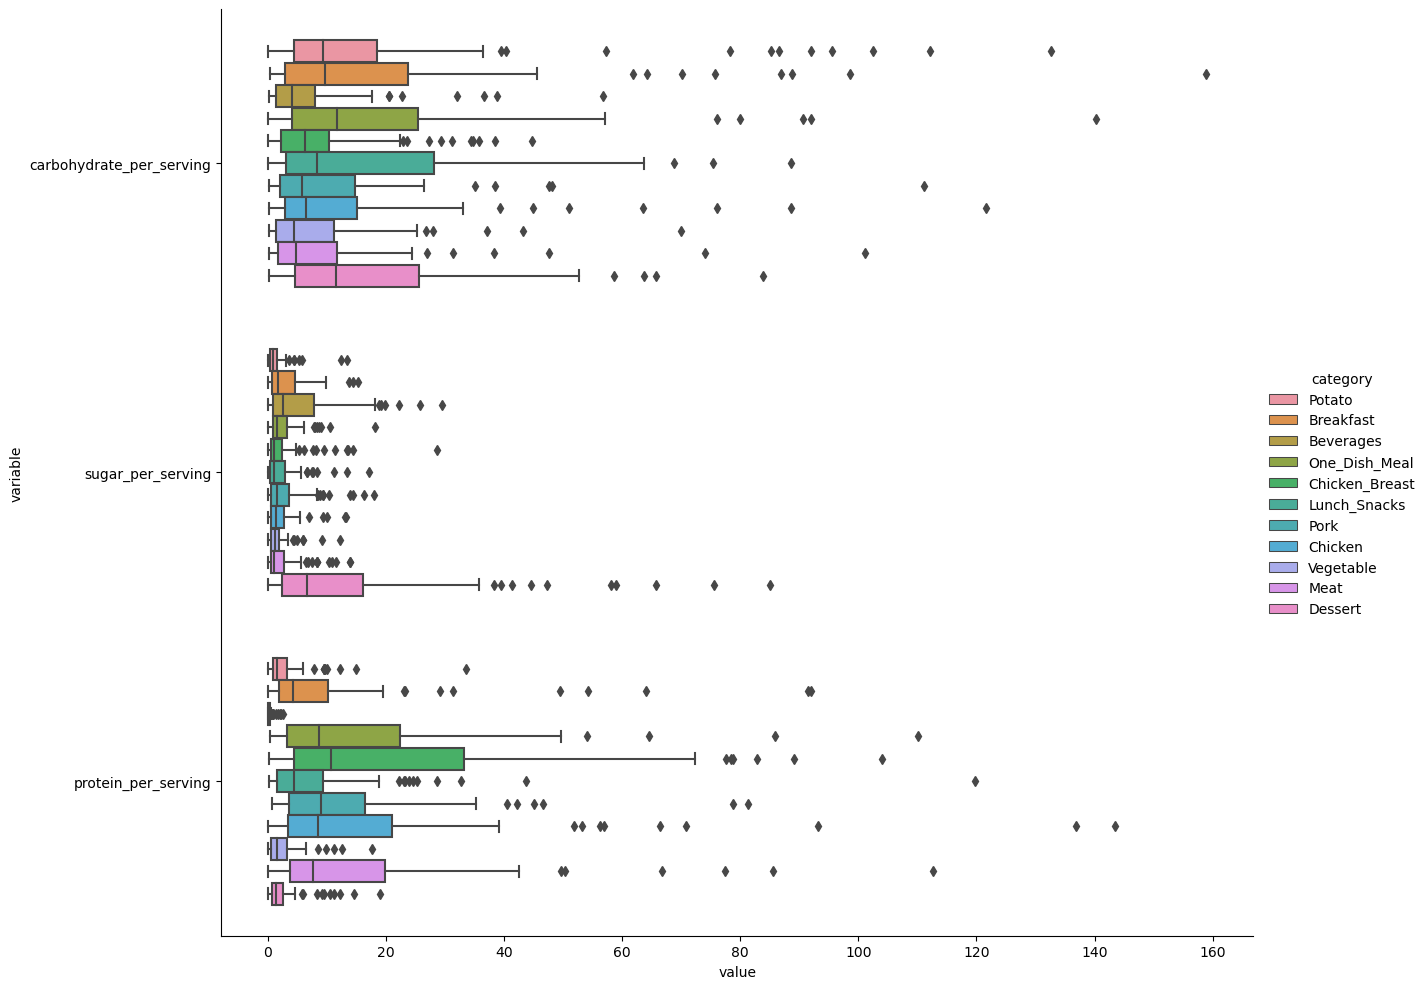

In [1452]:
# Use melt to reshape the DataFrame so that it has a single column for the values and a separate column for the variable
melted_df2 = qc_recipe_df.melt(id_vars=['category','servings'], value_vars=['carbohydrate_per_serving','sugar_per_serving','protein_per_serving'], value_name='value', var_name='variable')

# Create a new figure with a specific size
plt.figure(figsize=(20,5))

# Use catplot to create boxplots for the columns 'calories_per_serving', 'carbohydrate_per_serving', 'sugar_per_serving', 'protein_per_serving'
sns.catplot(data=melted_df2, x='value', y='variable', hue='category', kind='box', height=10, aspect=1.3)

# Show the plot
plt.show()

### Let's now deal with the non-data value we have in the dataframe, by using the average of the food specs ('carbohydrate_per_serving','sugar_per_serving','protein_per_serving') per category 

In [1453]:
# group data by category
grouped_data = qc_recipe_df.groupby('category')

# calculate median of food specs per category
median_carbohydrate = grouped_data['carbohydrate_per_serving'].median()
median_sugar = grouped_data['sugar_per_serving'].median()
median_protein = grouped_data['protein_per_serving'].median()

# fill non-data values in original dataframe with calculated median, as each distribution of macro nutrient is right-skewed
qc_recipe_df['carbohydrate_per_serving'] = qc_recipe_df['carbohydrate_per_serving'].fillna(qc_recipe_df.groupby('category')['carbohydrate_per_serving'].transform('median'))
qc_recipe_df['sugar_per_serving'] = qc_recipe_df['sugar_per_serving'].fillna(qc_recipe_df.groupby('category')['sugar_per_serving'].transform('median'))
qc_recipe_df['protein_per_serving'] = qc_recipe_df['protein_per_serving'].fillna(qc_recipe_df.groupby('category')['protein_per_serving'].transform('median'))
qc_recipe_df['calories_per_serving'] = qc_recipe_df['calories_per_serving'].fillna(qc_recipe_df.groupby('category')['calories_per_serving'].transform('median'))


<AxesSubplot: >

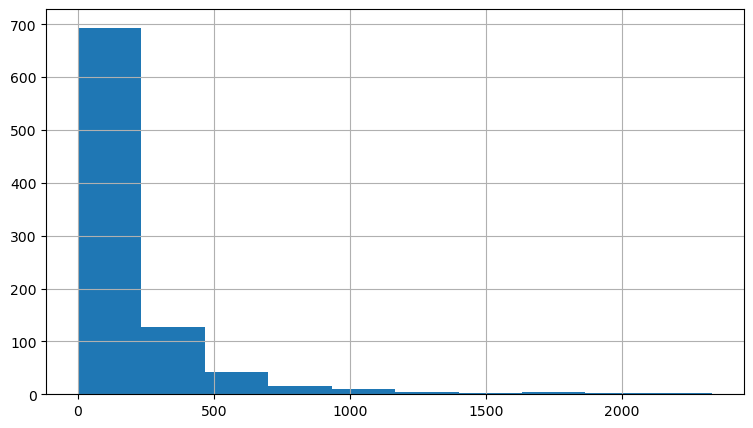

In [1454]:
# Set the plot size by default for all matplotlib images
plt.rc('figure', figsize=(9,5))

qc_recipe_df['calories_per_serving'].hist()

In [1455]:
qc_recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 2 to 947
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   calories                  891 non-null    float64
 1   carbohydrate              891 non-null    float64
 2   sugar                     891 non-null    float64
 3   protein                   891 non-null    float64
 4   category                  907 non-null    object 
 5   servings                  907 non-null    int64  
 6   high_traffic              907 non-null    int64  
 7   calories_per_serving      907 non-null    float64
 8   carbohydrate_per_serving  907 non-null    float64
 9   sugar_per_serving         907 non-null    float64
 10  protein_per_serving       907 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 85.0+ KB


In [1456]:
qc_recipe_df['high_traffic'].value_counts()

1    542
0    365
Name: high_traffic, dtype: int64

## EXploratory Data Analysis 
--- 

In [1457]:
EDA_recipe_df = qc_recipe_df.drop(columns=["sugar", "calories", "protein", "carbohydrate"])


### Calculating Fat amount in g, and macro-nutrient %

In [1458]:
# we can use the formula : Fat (g) = (Total Calories - (Protein (g) * 4 + Carbohydrates (g) * 4 + Sugar (g) * 4)) / 9
# approximation from source: https://www.livestrong.com/article/81042-calculate-percentage-calories-fat-carbohydrate/
# ‌Carbohydrates:‌ 4 calories per gram
#  Fat:‌ 9 calories per gram
#  Protein:‌ 4 calories per gram
#  average daily intake = 1,600 calories per day per person

EDA_recipe_df['fat_per_serving'] = (EDA_recipe_df['calories_per_serving'] - ( EDA_recipe_df['protein_per_serving']*4 + EDA_recipe_df['sugar_per_serving']*4) )/9
EDA_recipe_df['fat_per_serving'] = EDA_recipe_df['fat_per_serving'].clip(lower=0)


<AxesSubplot: >

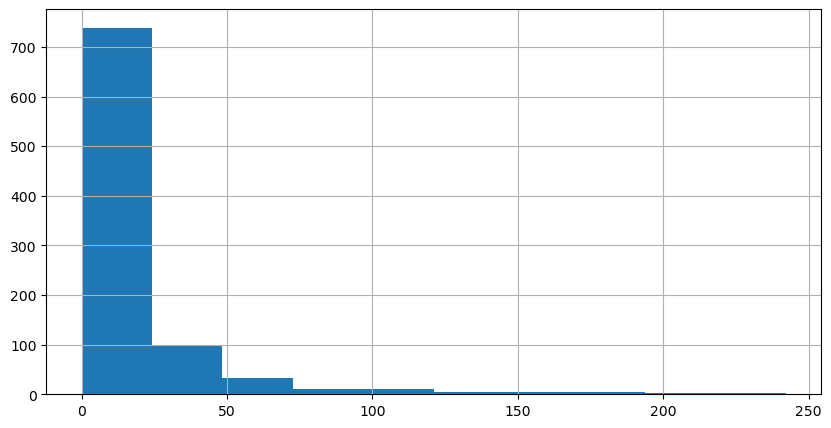

In [1459]:
# Set the plot size
plt.subplots(figsize=(10,5))

EDA_recipe_df['fat_per_serving'].hist()

In [1460]:
EDA_recipe_df['fat_per_serving'].describe()

count   907.00
mean     16.34
std      28.97
min       0.00
25%       0.34
50%       6.54
75%      19.52
max     242.28
Name: fat_per_serving, dtype: float64

In [1461]:
# Now let's calculate the percentengages of macro nurients
EDA_recipe_df['weight_per_serving'] = EDA_recipe_df['fat_per_serving'] + EDA_recipe_df['protein_per_serving'] + EDA_recipe_df['carbohydrate_per_serving']+ EDA_recipe_df['sugar_per_serving']
EDA_recipe_df['carb_%'] = EDA_recipe_df['carbohydrate_per_serving'] / EDA_recipe_df['weight_per_serving']
EDA_recipe_df['protein_%'] = EDA_recipe_df['protein_per_serving'] / EDA_recipe_df['weight_per_serving']
EDA_recipe_df['fat_%'] = EDA_recipe_df['fat_per_serving'] / EDA_recipe_df['weight_per_serving']
EDA_recipe_df['daily_intake_%'] = EDA_recipe_df['calories_per_serving'] / 1600

In [1462]:
EDA_recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 2 to 947
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   category                  907 non-null    object 
 1   servings                  907 non-null    int64  
 2   high_traffic              907 non-null    int64  
 3   calories_per_serving      907 non-null    float64
 4   carbohydrate_per_serving  907 non-null    float64
 5   sugar_per_serving         907 non-null    float64
 6   protein_per_serving       907 non-null    float64
 7   fat_per_serving           907 non-null    float64
 8   weight_per_serving        907 non-null    float64
 9   carb_%                    907 non-null    float64
 10  protein_%                 907 non-null    float64
 11  fat_%                     907 non-null    float64
 12  daily_intake_%            907 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 99.2+ KB


In [1463]:
EDA_recipe_df.describe()

,servings,high_traffic,calories_per_serving,carbohydrate_per_serving,sugar_per_serving,protein_per_serving,fat_per_serving,weight_per_serving,carb_%,protein_%,fat_%,daily_intake_%
count,907.00,907.00,907.00,907.00,907.00,907.00,907.00,907.00,907.00,907.00,907.00,907.00
mean,3.46,0.60,190.53,13.98,3.62,10.16,16.34,44.09,0.33,0.22,0.33,0.12
std,1.74,0.49,288.26,19.73,7.21,17.89,28.97,47.58,0.24,0.23,0.28,0.18
min,1.00,0.00,0.07,0.01,0.00,0.00,0.00,1.24,0.00,0.00,0.00,0.00
25%,2.00,0.00,34.66,2.52,0.55,1.01,0.34,15.10,0.12,0.04,0.02,0.02
50%,4.00,1.00,94.97,6.84,1.37,3.35,6.54,27.18,0.29,0.14,0.29,0.06
75%,4.00,1.00,222.00,15.79,3.58,10.66,19.52,53.65,0.51,0.33,0.56,0.14
max,6.00,1.00,"2,332.32",158.92,84.96,143.49,242.28,307.29,0.95,0.97,0.98,1.46


### Clustering in Macro Nutrient Categories
---

##### We will use KMeans with 4 cluster first 

In [1464]:
from sklearn.cluster import KMeans

data = EDA_recipe_df[["carb_%", "protein_%", "fat_%"]].values

# Initialize the KMeans model with 6 clusters
kmeans = KMeans(n_clusters=4)

# Fit the model to the data
kmeans.fit(data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels as a new column in the DataFrame
EDA_recipe_df["cluster"] = labels

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [1465]:
# Group the DataFrame by the cluster labels and calculate the mean for each column
cluster_means = EDA_recipe_df[["carb_%", "protein_%", "fat_%","cluster"]].groupby("cluster").mean().reset_index()

print(cluster_means)

   cluster  carb_%  protein_%  fat_%
0        0    0.34       0.13   0.34
1        1    0.12       0.13   0.68
2        2    0.19       0.63   0.08
3        3    0.67       0.13   0.09


##### We will manually add a 4th class, corresponding to balanced foods. 
##### For this, we will first creeate a Mask for balanced foods: 

In [1466]:
# Filter the data to include only instances that fit the ranges for foods that are balanced for adults: 
# balanced_food will be in the following ranges : 
# - protein_% >=10 and protein_% <=35
# - fat_% >= 20% and fat_% <= 35%
# - carb_% >= 45% and carb_% <= 70%

mask = (
    (EDA_recipe_df['protein_%'] >= .1) & (EDA_recipe_df['protein_%'] <= .4) 
    & ((EDA_recipe_df['fat_%'] >= .15) & (EDA_recipe_df['fat_%'] <= .6)) 
    & ((EDA_recipe_df['carb_%'] >= .15) & (EDA_recipe_df['carb_%'] < .7))
)

balanced_food = EDA_recipe_df[mask]

balanced_recipe_df = EDA_recipe_df[mask]

# Assign a new label named 4  to the instances that belong to the new category
EDA_recipe_df['cluster'] = np.where(mask, 4, EDA_recipe_df['cluster'])

In [1467]:
print("Total % of balanced food in the website= ",round(len (balanced_recipe_df)/len (EDA_recipe_df),2)*100," %")

Total % of balanced food in the website=  16.0  %


In [1468]:
for i in range(0,5) : 
    print ("cluster ",i," ratio = ", 
        round(len(EDA_recipe_df.loc[EDA_recipe_df['cluster']==i])/len(EDA_recipe_df),2)
    )

cluster  0  ratio =  0.16
cluster  1  ratio =  0.27
cluster  2  ratio =  0.18
cluster  3  ratio =  0.22
cluster  4  ratio =  0.16


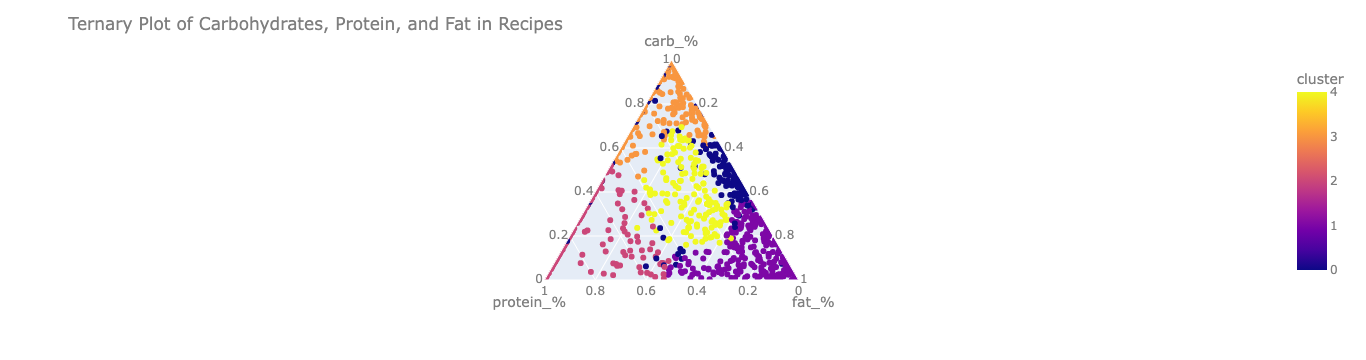

In [1469]:
import plotly.express as px

fig = px.scatter_ternary(EDA_recipe_df, a="carb_%", b="protein_%", c="fat_%",color='cluster',hover_name='cluster')
fig.update_layout(
    title="Ternary Plot of Carbohydrates, Protein, and Fat in Recipes",
    font=dict(
        size=12,
        color="#7f7f7f"
    ),
    scene=dict(
        xaxis_title="Carbohydrates (%)",
        yaxis_title="Protein (%)",
        zaxis_title="Fat (%)"
    )
)
fig.show()

### function for encoding dummies
---

In [1470]:
def dummies (df:pd.DataFrame,cols,prefix):
    # Select the categorical columns to be encoded
    categorical_cols = [cols]
    
    # Create dummy variables for each category
    df_dummies = pd.get_dummies(df[categorical_cols], prefix)
    
    # Drop the original categorical columns
    df.drop(categorical_cols, axis=1, inplace=True)
    
    # Concatenate the original dataframe with the dummy encoded dataframe
    df = pd.concat([df, df_dummies], axis=1)

    return df

In [1471]:
EDA_recipe_df = dummies (EDA_recipe_df,'category', 'meal')

In [1472]:
EDA_recipe_df.columns

Index(['servings', 'high_traffic', 'calories_per_serving',
       'carbohydrate_per_serving', 'sugar_per_serving', 'protein_per_serving',
       'fat_per_serving', 'weight_per_serving', 'carb_%', 'protein_%', 'fat_%',
       'daily_intake_%', 'cluster', 'meal_Beverages', 'meal_Breakfast',
       'meal_Chicken', 'meal_Chicken_Breast', 'meal_Dessert',
       'meal_Lunch_Snacks', 'meal_Meat', 'meal_One_Dish_Meal', 'meal_Pork',
       'meal_Potato', 'meal_Vegetable'],
      dtype='object')

In [1473]:
EDA_recipe_df['cluster'] = EDA_recipe_df['cluster'].astype(str)

In [1474]:
EDA_recipe_df.dtypes

servings                      int64
high_traffic                  int64
calories_per_serving        float64
carbohydrate_per_serving    float64
sugar_per_serving           float64
protein_per_serving         float64
fat_per_serving             float64
weight_per_serving          float64
carb_%                      float64
protein_%                   float64
fat_%                       float64
daily_intake_%              float64
cluster                      object
meal_Beverages                uint8
meal_Breakfast                uint8
meal_Chicken                  uint8
meal_Chicken_Breast           uint8
meal_Dessert                  uint8
meal_Lunch_Snacks             uint8
meal_Meat                     uint8
meal_One_Dish_Meal            uint8
meal_Pork                     uint8
meal_Potato                   uint8
meal_Vegetable                uint8
dtype: object

In [1475]:
EDA_recipe_df = dummies (EDA_recipe_df,'cluster', 'type')

In [1476]:
EDA_recipe_df.columns

Index(['servings', 'high_traffic', 'calories_per_serving',
       'carbohydrate_per_serving', 'sugar_per_serving', 'protein_per_serving',
       'fat_per_serving', 'weight_per_serving', 'carb_%', 'protein_%', 'fat_%',
       'daily_intake_%', 'meal_Beverages', 'meal_Breakfast', 'meal_Chicken',
       'meal_Chicken_Breast', 'meal_Dessert', 'meal_Lunch_Snacks', 'meal_Meat',
       'meal_One_Dish_Meal', 'meal_Pork', 'meal_Potato', 'meal_Vegetable',
       'type_0', 'type_1', 'type_2', 'type_3', 'type_4'],
      dtype='object')

### Dealing with Class Imbalance
We will use oversampling the class 0 (low traffic) with the random duplication of observations with low traffic , as we don't want to remove observations of High Traffic (what we want to predit)

In [1477]:
# get the indices of the minority class
minority_indices = EDA_recipe_df[EDA_recipe_df['high_traffic'] == 0].index

# get the indices of the majority class
majority_indices = EDA_recipe_df[EDA_recipe_df['high_traffic'] == 1].index

# randomly select equal number of indices from the minority class as the majority class
random_minority_indices = np.random.choice(minority_indices, len(majority_indices), replace=True)

# combine the indices of both classes
balanced_indices = np.concatenate([majority_indices, random_minority_indices])

# balance the classes using the indices
BAL_recipe_df = EDA_recipe_df.loc[balanced_indices]

In [1478]:
BAL_recipe_df['high_traffic'].value_counts()

1    542
0    542
Name: high_traffic, dtype: int64

---

### Generating the Features and Target Sets

#### Create the features set

In [1479]:
# Assign a copy of the sma_fast and sma_slow columns to a new DataFrame called X
X = BAL_recipe_df.drop(columns=["high_traffic"])
#X = X.drop(columns=["cluster"])

# Display sample data
display(X.head())
display(X.tail())

,servings,calories_per_serving,carbohydrate_per_serving,sugar_per_serving,protein_per_serving,fat_per_serving,weight_per_serving,carb_%,protein_%,fat_%,...,meal_Meat,meal_One_Dish_Meal,meal_Pork,meal_Potato,meal_Vegetable,type_0,type_1,type_2,type_3,type_4
recipe_id,,,,,,,,,,,,,,,,,,,,,
2,4,8.87,9.64,0.17,0.23,0.81,10.84,0.89,0.02,0.07,...,0,0,0,1,0,0,0,0,1,0
4,4,24.26,7.64,9.66,0.01,0.00,17.30,0.44,0.00,0.00,...,0,0,0,0,0,0,0,0,1,0
6,2,345.57,1.73,0.82,26.96,26.05,55.57,0.03,0.49,0.47,...,0,1,0,0,0,0,1,0,0,0
9,6,89.75,0.63,0.56,0.63,9.44,11.27,0.06,0.06,0.84,...,0,0,1,0,0,0,1,0,0,0
13,4,68.66,5.87,0.39,0.64,7.17,14.07,0.42,0.05,0.51,...,0,0,0,1,0,1,0,0,0,0


,servings,calories_per_serving,carbohydrate_per_serving,sugar_per_serving,protein_per_serving,fat_per_serving,weight_per_serving,carb_%,protein_%,fat_%,...,meal_Meat,meal_One_Dish_Meal,meal_Pork,meal_Potato,meal_Vegetable,type_0,type_1,type_2,type_3,type_4
recipe_id,,,,,,,,,,,,,,,,,,,,,
491,4,6.95,6.31,4.39,0.01,0.00,10.71,0.59,0.00,0.00,...,0,0,0,0,0,0,0,0,1,0
324,4,12.38,16.66,1.17,13.33,0.00,31.16,0.53,0.43,0.00,...,0,0,0,0,0,0,0,0,1,0
752,6,5.38,22.32,2.39,0.12,0.00,24.83,0.90,0.00,0.00,...,0,0,0,0,0,0,0,0,1,0
620,4,10.32,1.11,0.76,2.27,0.00,4.14,0.27,0.55,0.00,...,0,0,0,0,0,0,0,1,0,0
409,4,268.35,2.08,4.03,2.04,27.12,35.27,0.06,0.06,0.77,...,0,0,0,0,0,0,1,0,0,0


#### Create the target set

In [1480]:
# Copy the new signal column to a new Series called y.
y = BAL_recipe_df["high_traffic"].copy()

### Identifying statistically significant features
---
since we have a categorical dependent variable (high or low traffic), I will use chi-squared test (chi2) from the sklearn.feature_selection module to identify the features that are statistically significant. 

In [1481]:
from sklearn.feature_selection import SelectKBest, chi2

# Select the top k features based on chi2 test
selector = SelectKBest(chi2, k=20)
selector.fit(X, y)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

In [1482]:
selected_features

array([ 1,  2,  3,  4,  5,  6,  8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20,
       21, 24, 26])

In [1483]:
# Get the p-values for each feature
scores = selector.scores_

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Get the names of the columns in the feature matrix
column_chi2 = [i for i in X.columns if i in X]

# Print the selected features with their corresponding p-values
for i, selected_feature in enumerate(selected_features):
    print(f"{column_chi2[selected_feature]} selected with a chi2 score of {scores[selected_feature]}")


calories_per_serving selected with a chi2 score of 923.0796783926946
carbohydrate_per_serving selected with a chi2 score of 75.16392111673314
sugar_per_serving selected with a chi2 score of 19.239230542673134
protein_per_serving selected with a chi2 score of 10.367080331233154
fat_per_serving selected with a chi2 score of 185.93297273080347
weight_per_serving selected with a chi2 score of 180.80590895836778
protein_% selected with a chi2 score of 0.734926188500671
daily_intake_% selected with a chi2 score of 0.5769247989954307
meal_Beverages selected with a chi2 score of 116.73529411764706
meal_Breakfast selected with a chi2 score of 34.507462686567166
meal_Chicken selected with a chi2 score of 19.755102040816325
meal_Chicken_Breast selected with a chi2 score of 12.5
meal_Lunch_Snacks selected with a chi2 score of 0.494949494949495
meal_Meat selected with a chi2 score of 17.77922077922078
meal_One_Dish_Meal selected with a chi2 score of 16.514285714285716
meal_Pork selected with a chi2

In [1484]:
selected_features

array([ 1,  2,  3,  4,  5,  6,  8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20,
       21, 24, 26])

In [1485]:
# keep only specified columns in the dataframe
X = X.iloc[:, selected_features]

In [1486]:
X

,calories_per_serving,carbohydrate_per_serving,sugar_per_serving,protein_per_serving,fat_per_serving,weight_per_serving,protein_%,daily_intake_%,meal_Beverages,meal_Breakfast,meal_Chicken,meal_Chicken_Breast,meal_Lunch_Snacks,meal_Meat,meal_One_Dish_Meal,meal_Pork,meal_Potato,meal_Vegetable,type_2,type_4
recipe_id,,,,,,,,,,,,,,,,,,,,
2,8.87,9.64,0.17,0.23,0.81,10.84,0.02,0.01,0,0,0,0,0,0,0,0,1,0,0,0
4,24.26,7.64,9.66,0.01,0.00,17.30,0.00,0.02,1,0,0,0,0,0,0,0,0,0,0,0
6,345.57,1.73,0.82,26.96,26.05,55.57,0.49,0.22,0,0,0,0,0,0,1,0,0,0,0,0
9,89.75,0.63,0.56,0.63,9.44,11.27,0.06,0.06,0,0,0,0,0,0,0,1,0,0,0,0
13,68.66,5.87,0.39,0.64,7.17,14.07,0.05,0.04,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,6.95,6.31,4.39,0.01,0.00,10.71,0.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0
324,12.38,16.66,1.17,13.33,0.00,31.16,0.43,0.01,0,1,0,0,0,0,0,0,0,0,0,0
752,5.38,22.32,2.39,0.12,0.00,24.83,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0


### keep only the features with the lowest correlation between themselves:

---


# calculate the correlation matrix
corr_matrix = X.corr().abs()

# get the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# get the index of the features with the lowest correlation
to_keep = [column for column in upper.columns if any(upper[column] < 0.8)]

# keep only the features with the lowest correlation
X = X[to_keep]


In [1487]:
len(X.columns)

20

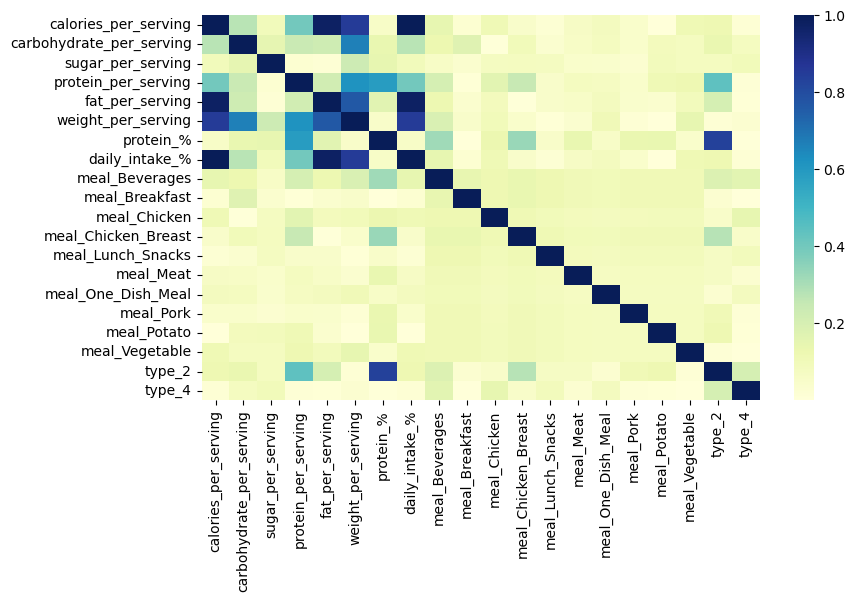

In [1488]:
#pplot correlation matrix
dataplot=sns.heatmap(X.corr().abs(), cmap="YlGnBu")
  
# displaying heatmap
plt.show()

In [1489]:
X.columns

Index(['calories_per_serving', 'carbohydrate_per_serving', 'sugar_per_serving',
       'protein_per_serving', 'fat_per_serving', 'weight_per_serving',
       'protein_%', 'daily_intake_%', 'meal_Beverages', 'meal_Breakfast',
       'meal_Chicken', 'meal_Chicken_Breast', 'meal_Lunch_Snacks', 'meal_Meat',
       'meal_One_Dish_Meal', 'meal_Pork', 'meal_Potato', 'meal_Vegetable',
       'type_2', 'type_4'],
      dtype='object')

---

### Split the Data Into Training and Testing Datasets

#### Creating the Training and Testing Datasets

In [1490]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Standardizing the Data

In [1492]:
# Imports
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

### Incorporate the SVM Machine Learning Into the Trading Strategy

In [1493]:
# Imports
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score

In [1494]:
# Create the classifier model
svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0])

In [1495]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       381
           1       0.85      0.69      0.76       377

    accuracy                           0.78       758
   macro avg       0.79      0.78      0.78       758
weighted avg       0.79      0.78      0.78       758



In [1496]:
test_predictions = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions, average='micro')

# Print the results
print(f'Test accuracy: {accuracy:.2f}')
print(f'Test F1 score: {f1:.2f}')

Test accuracy: 0.77
Test F1 score: 0.77


In [1497]:
# Evaluate the model using a classification report
testing_report = classification_report(y_test, test_predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       381
           1       0.85      0.69      0.76       377

    accuracy                           0.78       758
   macro avg       0.79      0.78      0.78       758
weighted avg       0.79      0.78      0.78       758



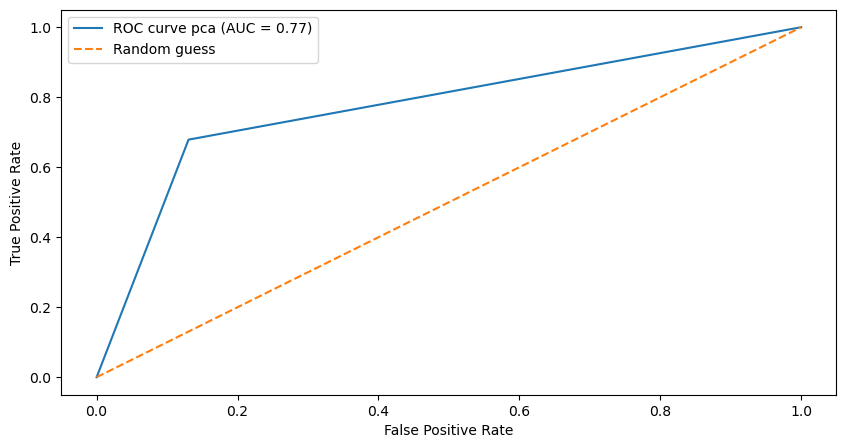

In [1498]:
# display ROC_curve and claculate AUC
from sklearn.metrics import roc_curve, roc_auc_score

# calculate the true positive rate and false positive rate for different probability thresholds:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)

# Calculate the AUC 
auc = roc_auc_score(y_test, test_predictions )

# Set the plot size
plt.subplots(figsize=(10,5))

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve pca (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


---

# Add a New Machine Learning Model

## Import the `RandomForest` model from scikit-learn.


In [1499]:
# Import RandomForest from sklearn
from sklearn.ensemble import RandomForestClassifier

In [1500]:
# Create an instance of the RandomForest model
rf_classifier = RandomForestClassifier()

## Using the same training data that the SVM model used (`X_train_scaled` and `y_train`), fit the `RandomForest` model.

In [1501]:
# Fit the LogisticRegression model
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier()

## Use the trained model to predict the trading signals for the training data. Use the `classification_report` module to evaluate the model.

In [1502]:
# Use the trained LogisticRegression model to predict the trading signals for the training data
rf_training_signal_predictions = rf_classifier.predict(X_train_scaled)

In [1503]:
# Generate a classification report using the training data and the logistic regression model's predications
rf_training_report = classification_report(y_train, rf_training_signal_predictions)

# Review the classification report
print(rf_training_report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       381
           1       1.00      0.99      1.00       377

    accuracy                           1.00       758
   macro avg       1.00      1.00      1.00       758
weighted avg       1.00      1.00      1.00       758



## Backtest the `RandomForestClassifier` model using the testing data to evaluate its performance.

In [1504]:
# Use the trained model to predict the trading signals for the testing data.
rf_test_predictions = rf_classifier.predict(X_test_scaled)

In [1505]:
# Generate a classification report using the testing data and the logistic regression model's predictions
rf_testing_report = classification_report(y_test, rf_test_predictions)

# Review the testing classification report
print(rf_testing_report)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       161
           1       0.86      0.81      0.84       165

    accuracy                           0.84       326
   macro avg       0.84      0.84      0.84       326
weighted avg       0.84      0.84      0.84       326



In [1506]:
# Calculate the accuracy and F1 score for the test data
accuracy = accuracy_score(y_test, rf_test_predictions)
f1 = f1_score(y_test, rf_test_predictions, average='micro')

# Print the results
print(f'Test accuracy: {accuracy:.2f}')
print(f'Test F1 score: {f1:.2f}')

Test accuracy: 0.84
Test F1 score: 0.84


# Part 2 - xgboost Classifier

---

### Incorporate the xgboost Machine Learning Into the Trading Strategy

In [1507]:
import xgboost as xgb
#from xgboost import xgbClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

# Create a xgb Classifier model
xgb_clf = xgb.XGBClassifier(reg_alpha=5)

xgb_clf.fit(X_train_scaled, y_train)

# Use the best model to make predictions on the test data
y_pred_xgb = xgb_clf.predict(X_test_scaled)

# Calculate the accuracy and F1 score for the test data
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb, average='micro')

# Print the results
print(f'Test accuracy: {accuracy:.2f}')
print(f'Test F1 score: {f1:.2f}')

Test accuracy: 0.81
Test F1 score: 0.81


### Displaying ROC Curve

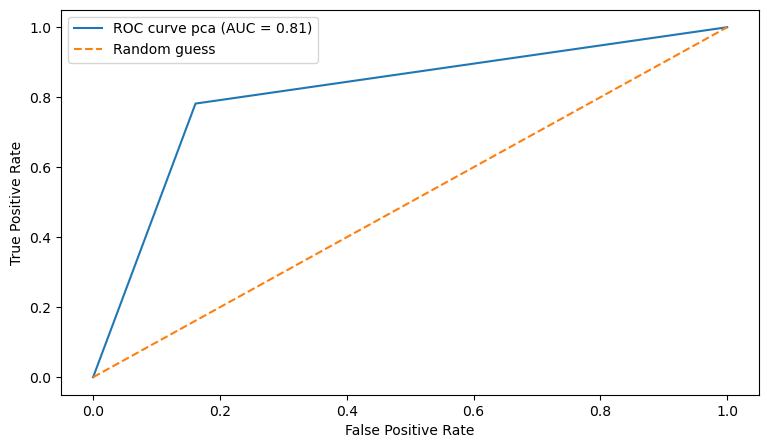

In [1508]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

xgb_signal_predictions = xgb_clf.predict(X_test_scaled)

#Calculate ROC Curve
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_signal_predictions )

# Calculate the AUC 
xgb_auc = roc_auc_score(y_test, xgb_signal_predictions )

# Plot the ROC curve
plt.plot(xgb_fpr, xgb_tpr, label='ROC curve pca (AUC = {:.2f})'.format(xgb_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [1509]:
# Generate a classification report using the training data predictions
xgb_training_predictions = xgb_clf.predict(X_train_scaled)
xgb_training_report = classification_report(y_train, xgb_training_predictions)

# Review the testing classification report
print(xgb_training_report)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       381
           1       0.91      0.87      0.89       377

    accuracy                           0.89       758
   macro avg       0.89      0.89      0.89       758
weighted avg       0.89      0.89      0.89       758



In [1510]:
# Generate a classification report using the testing data and the pca model's predictions
xgb_testing_report = classification_report(y_test, xgb_signal_predictions)

# Review the testing classification report
print(xgb_testing_report)

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       161
           1       0.83      0.78      0.81       165

    accuracy                           0.81       326
   macro avg       0.81      0.81      0.81       326
weighted avg       0.81      0.81      0.81       326



### Introducting SHAP
--- 
from (https://www.dominodatalab.com/blog/shap-lime-python-libraries-part-2-using-shap-lime)

In [1511]:
import shap 
import sklearn #for building models
import xgboost as xgb #for building models
import sklearn.ensemble #for building models
import lime #LIME package
import lime.lime_tabular #the type of LIIME analysis we’ll do

# Random Forest
#rf = sklearn.ensemble.RandomForestRegressor()
# rf.fit(X_train, y_train)



In [1512]:
# Tree on XGBoost
explainerXGB = shap.TreeExplainer(xgb_clf)
shap_values_XGB_test = explainerXGB.shap_values(X_test)
shap_values_XGB_train = explainerXGB.shap_values(X_train)

# Tree on Random Forest explainer
explainerRF = shap.TreeExplainer(rf_classifier)
shap_values_RF_test = explainerRF.shap_values(X_test)
shap_values_RF_train = explainerRF.shap_values(X_train)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [1513]:
## setting up LIME 
# if a feature has 10 or less unique values then treat it as categorical
categorical_features = np.argwhere(np.array([len(set(X_train.values[:,x]))
for x in range(X_train.values.shape[1])]) <= 10).flatten() 
    # LIME has one explainer for all models
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
    feature_names=X_train.columns.values.tolist(),
    class_names=['price'],
    categorical_features=categorical_features,
    verbose=True, mode='regression')

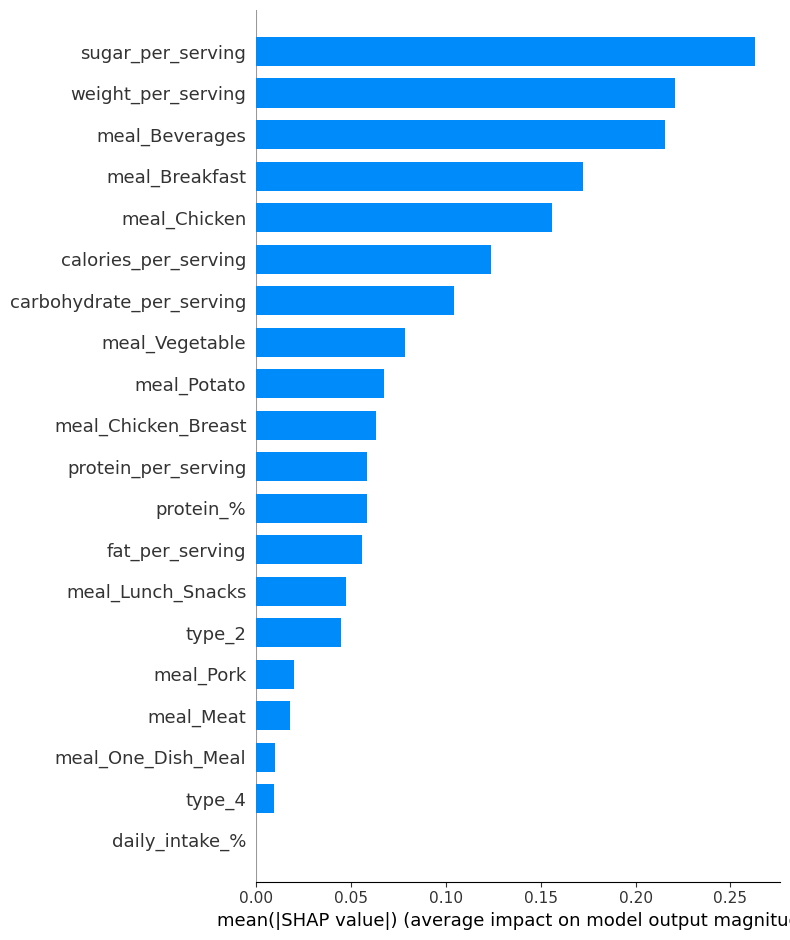

In [1514]:
shap.summary_plot(shap_values_XGB_test, X_test, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


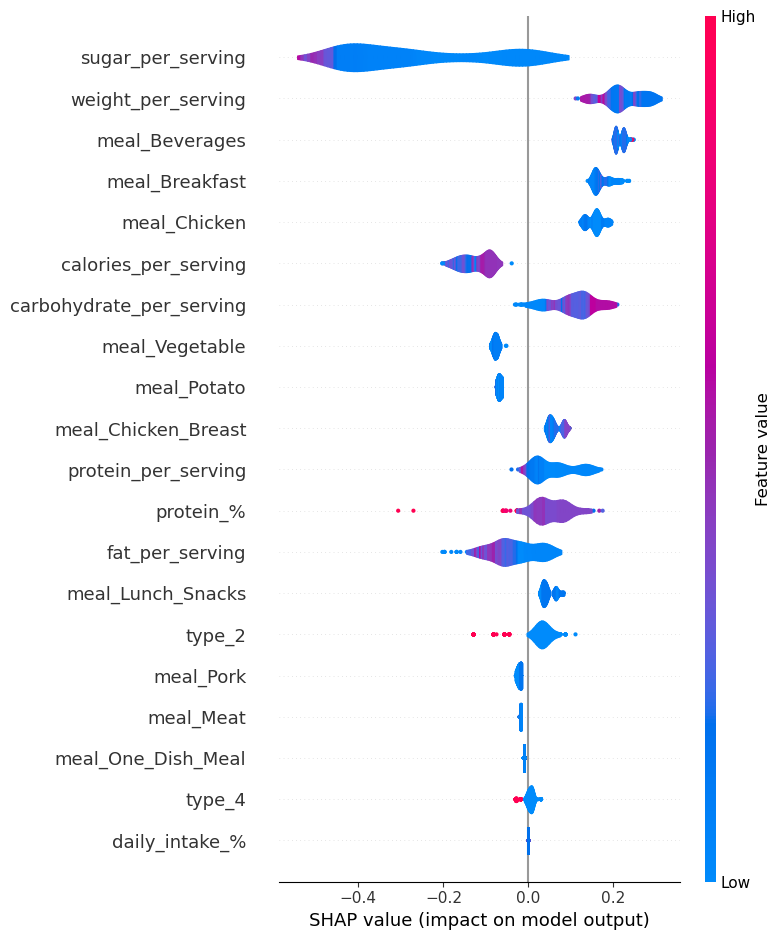

In [1515]:
# summarize the effects of all the features
shap.summary_plot(shap_values_XGB_test, X_test,plot_type='violin')

### Using a neural network NNT

In [1516]:
# Import the `Dropout` layer
from keras.layers import Dropout
# Import regularization functions
from keras.regularizers import l1, l2
from keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential

In [1517]:
# Build the Model
model = Sequential()
# number of feaatures to be used as input 
nb_input = len(X.columns)
# Add a dense layer
model.add(Dense(18, input_dim=nb_input, activation='relu'))
# Now add a dropout layer
model.add(Dropout(.2,input_shape=(10,)))
# Add another dense layer
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
# Now add a dropout layer
model.add(Dropout(.2,input_shape=(10,)))

# Add the output layer to the model specifying the number of output neurons and activation function
model.add(Dense(units=1, activation="sigmoid"))

In [1518]:

# Compile the Sequential model
#model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [1519]:
# Summarise the model
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 18)                378       
                                                                 
 dropout_28 (Dropout)        (None, 18)                0         
                                                                 
 dense_43 (Dense)            (None, 8)                 152       
                                                                 
 dropout_29 (Dropout)        (None, 8)                 0         
                                                                 
 dense_44 (Dense)            (None, 1)                 9         
                                                                 
Total params: 539
Trainable params: 539
Non-trainable params: 0
_________________________________________________________________


In [1520]:
# Add in validation loss to select the number of epochs
# Fit the model
number_of_epochs = 10
model.fit(X_train,y_train, 
                    epochs=number_of_epochs,
                    batch_size=10,
                    #validation_split=0.2,
                    shuffle=True)

Epoch 1/10


2023-02-05 08:33:44.091252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


76/76 [==============================] - 2s 17ms/step - loss: 7.1796 - accuracy: 0.5092
Epoch 2/10
76/76 [==============================] - 1s 10ms/step - loss: 3.2423 - accuracy: 0.5277
Epoch 3/10
76/76 [==============================] - 1s 10ms/step - loss: 2.0912 - accuracy: 0.5132
Epoch 4/10
76/76 [==============================] - 1s 9ms/step - loss: 1.8960 - accuracy: 0.5356
Epoch 5/10
76/76 [==============================] - 1s 10ms/step - loss: 1.3564 - accuracy: 0.5831
Epoch 6/10
76/76 [==============================] - 1s 10ms/step - loss: 1.2152 - accuracy: 0.5449
Epoch 7/10
76/76 [==============================] - 1s 9ms/step - loss: 1.2046 - accuracy: 0.5501
Epoch 8/10
76/76 [==============================] - 1s 10ms/step - loss: 1.0069 - accuracy: 0.5515
Epoch 9/10
76/76 [==============================] - 1s 10ms/step - loss: 0.8626 - accuracy: 0.5528
Epoch 10/10
76/76 [==============================] - 1s 9ms/step - loss: 0.7996 - accuracy: 0.5435


### Step 2: Evaluate the model using the test data to determine its loss and accuracy.

In [1521]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2023-02-05 08:33:52.680251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 - 0s - loss: 0.7029 - accuracy: 0.6718 - 491ms/epoch - 45ms/step
Loss: 0.7029309868812561, Accuracy: 0.6717791557312012


### ML Model selection
---

In [1522]:
### Choose the best ML model for our set : 
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianN

In [1523]:
def model_selection(X,Y):
    seed = 7
    models = []
    models.append(('LogisticRegression', LogisticRegression(random_state=seed)))
    models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
    models.append(('KNeighborsClassifier', KNeighborsClassifier()))
    models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
    #models.append(('GaussianNB', GaussianNB()))
    models.append(('RandomForestClassifier', RandomForestClassifier()))
    models.append(('ExtraTreesClassifier',ExtraTreesClassifier(random_state=seed)))
    models.append(('AdaBoostClassifier',AdaBoostClassifier(DecisionTreeClassifier(random_state=seed),random_state=seed,learning_rate=0.1)))
    models.append(('SVM',svm.SVC(random_state=seed)))
    models.append(('GradientBoostingClassifier',GradientBoostingClassifier(random_state=seed)))
    models.append(('XGBoost', xgb.XGBClassifier(random_state=seed)))
    #models.append(('MLPClassifier',MLPClassifier(random_state=seed)))
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    
    for name, model in models:
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed) 
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg) 
    return results, names
 

In [1524]:
model_selection(X,y)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

LogisticRegression: 0.756354 (0.043670)
LinearDiscriminantAnalysis: 0.747095 (0.050073)
KNeighborsClassifier: 0.595906 (0.028534)
DecisionTreeClassifier: 0.810763 (0.047987)
RandomForestClassifier: 0.844869 (0.044331)
ExtraTreesClassifier: 0.844878 (0.052061)
AdaBoostClassifier: 0.822766 (0.056970)
SVM: 0.498199 (0.041568)
GradientBoostingClassifier: 0.800637 (0.047330)
XGBoost: 0.840265 (0.046607)


([array([0.75229358, 0.7706422 , 0.8440367 , 0.7706422 , 0.7962963 ,
         0.71296296, 0.67592593, 0.74074074, 0.76851852, 0.73148148]),
  array([0.76146789, 0.76146789, 0.83486239, 0.77981651, 0.76851852,
         0.64814815, 0.68518519, 0.73148148, 0.77777778, 0.72222222]),
  array([0.59633028, 0.65137615, 0.5412844 , 0.63302752, 0.60185185,
         0.59259259, 0.58333333, 0.59259259, 0.59259259, 0.57407407]),
  array([0.82568807, 0.87155963, 0.82568807, 0.85321101, 0.82407407,
         0.76851852, 0.74074074, 0.87962963, 0.76851852, 0.75      ]),
  array([0.88073394, 0.91743119, 0.88073394, 0.86238532, 0.84259259,
         0.77777778, 0.80555556, 0.87962963, 0.81481481, 0.78703704]),
  array([0.90825688, 0.89908257, 0.90825688, 0.81651376, 0.85185185,
         0.7962963 , 0.78703704, 0.89814815, 0.81481481, 0.76851852]),
  array([0.87155963, 0.88990826, 0.8440367 , 0.80733945, 0.82407407,
         0.76851852, 0.7962963 , 0.92592593, 0.75      , 0.75      ]),
  array([0.51376147,